# Avocado project

### Data description

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

Our task is to make a mode that can consider the data provided and predict the Average Price.

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
df= pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The average price is our target column. We can see that the end of the dataset is full of empty records.lets remove them

In [3]:
for i, row in df.iterrows():
    if row.isnull().any():
        print(i) 

1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716


We can see from index number 1517 to the end all values are empty.

In [4]:
df.iloc[1517]

Unnamed: 0      NaN
Date            NaN
AveragePrice    NaN
Total Volume    NaN
4046            NaN
4225            NaN
4770            NaN
Total Bags      NaN
Small Bags      NaN
Large Bags      NaN
XLarge Bags     NaN
type            NaN
year            NaN
region          NaN
Name: 1517, dtype: object

In [3]:
df = df.drop(index= range(1517,16468), axis=0)

In [4]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


## EDA

In [7]:
df.shape

(1517, 14)

Here we have 1517 rows and 14 columns to work with.

In the dataset we have some columns not usefull for model building. lets remove them.

In [5]:
df.drop(['Unnamed: 0','Date'], axis=1, inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [88]:
# Lets check for unique values

for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

AveragePrice
[1.33 1.35 0.93 1.08 1.28 1.26 0.99 0.98 1.02 1.07 1.12 1.31 1.11 1.34
 1.45 1.05 1.37 1.27 1.32 1.23 1.19 1.43 1.2  1.22 1.13 1.16 1.06 1.17
 1.24 0.96 1.   1.09 0.95 0.97 1.15 1.01 1.14 1.1  1.04 1.18 1.29 1.25
 1.03 1.39 1.4  1.36 1.3  0.88 1.21 0.9  0.94 0.75 0.77 0.81 0.8  0.72
 0.79 0.67 0.82 0.68 0.76 0.91 1.38 0.92 0.78 0.74 0.62 0.83 0.87 0.73
 0.7  0.89 0.85 1.44 1.42 1.41 0.49 0.53 0.66 0.56 0.6  0.71 0.65 0.58
 0.54 0.52 0.51 0.57 0.63 0.64 0.61 0.84 0.86 0.69 1.52 1.53 1.49 1.48
 1.56 1.62 1.63 1.46 1.51 1.61 1.47 1.66 1.57 1.6  1.5  1.68 1.54 1.64
 1.58]
Total Volume
[ 64236.62  54876.98 118220.22 ... 178410.82 189131.52 182978.3 ]
4046
[ 1036.74   674.28   794.7  ... 46364.75 54110.79 43116.41]
4225
[ 54454.85  44638.81 109149.67 ...  52893.38  53593.58  54193.42]
4770
[   48.16    58.33   130.5  ... 16736.92 17495.42 16563.91]
Total Bags
[ 8696.87  9505.56  8145.35 ... 62415.77 63931.73 69104.56]
Small Bags
[ 8603.62  9408.07  8042.21 ... 53332.61 55653.47 

We can see we have three columns with caterogical data. the type column has only one category.

In [89]:
df['type'].unique()

array(['conventional'], dtype=object)

Here we have only one category for entire dataset, hence it will play no part in model building. lets drop it.

In [6]:
df.drop(['type'], axis=1, inplace=True)

In [42]:
df.shape

(1517, 11)

Finally we are left with 1517 rows and 11 columns.

### Checking null values

In [101]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
region          0
dtype: int64

Here we can see no null values present in the dataset. Lets visualize it.

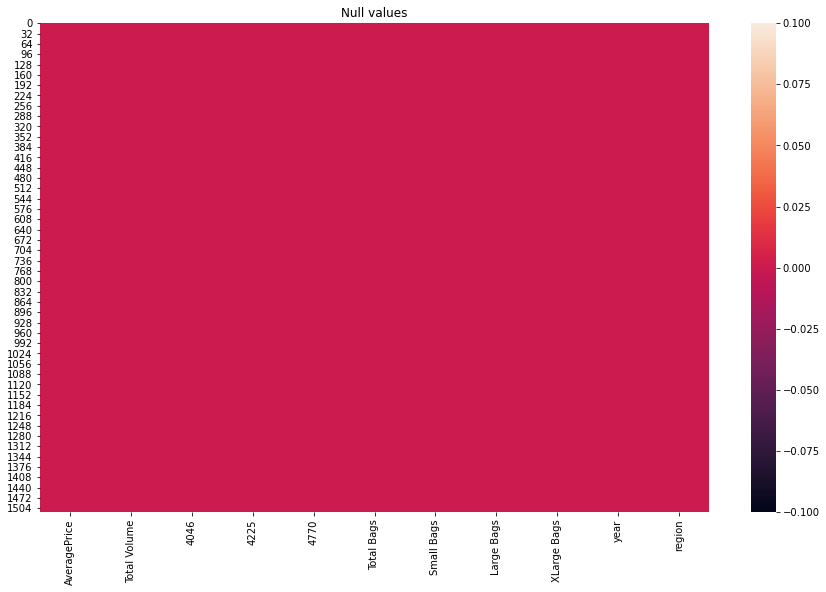

In [103]:
plt.figure(figsize=[15,9])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

By visualization we can also see no null values.

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   year          1517 non-null   float64
 10  region        1517 non-null   object 
dtypes: float64(10), object(1)
memory usage: 142.2+ KB


We can see the region column having object type data, but its not possible to perform calculation with object datatype. so we need to encode it.

### Encoding data

In [106]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [105]:
df['year'].unique()

array([2015., 2016.])

the year column contains data of two category. lets encode it as well.

In [7]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

In [8]:
colm= ['year','region']

for i in df[colm]:
    df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [9]:
df['year'].unique()

array([0., 1.])

In [10]:
df['region'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

The columns have been encoded.

In [116]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.162821,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,16.132398
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.000000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,1.000000,50.000000


All the columns have the same count.The difference between the mean and median is seems high in the columns, so the data could have skewness. Also there large difference between the mean and the maximum, hence the the dataset prone to outliers.

## Visualization

<function matplotlib.pyplot.show(*args, **kw)>

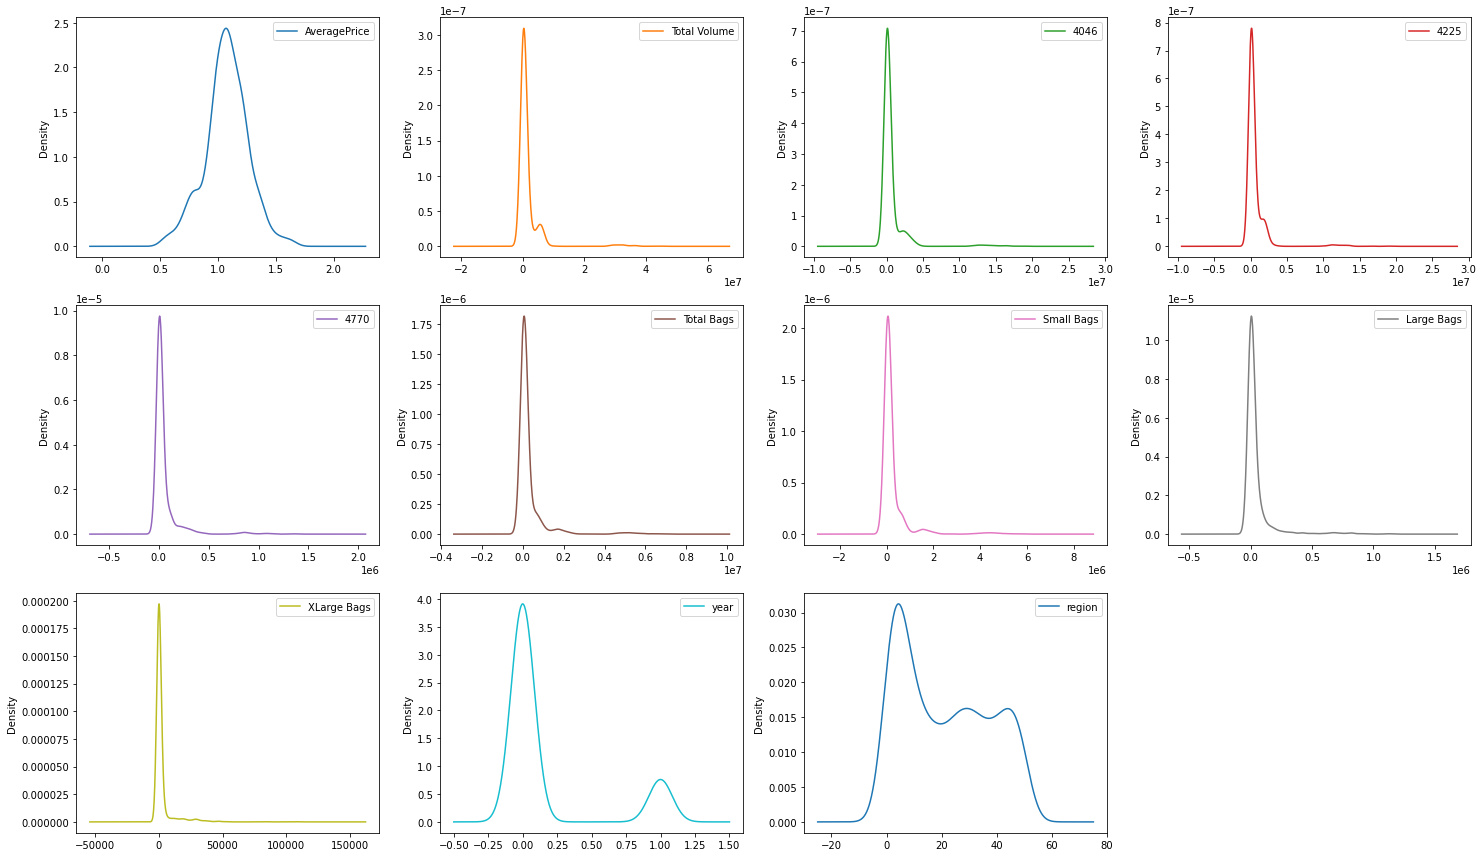

In [118]:
df.plot(kind='density', subplots= True, layout=(3,4),sharex=False, legend=True, figsize=[25,15])
plt.show

We can check the distribution of all the columns. lets check closely.

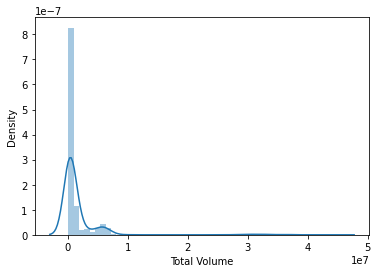

In [120]:
sns.distplot(df['Total Volume']);

We can see a lot of skewness at the end.right skewed.

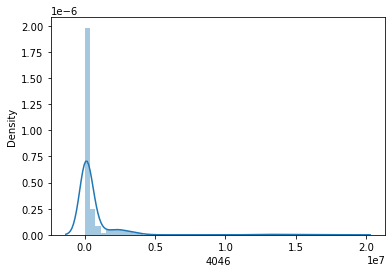

In [122]:
sns.distplot(df['4046']);

Here we have skewness as well.

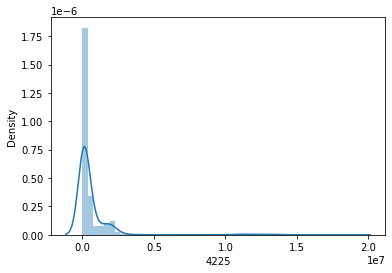

In [123]:
sns.distplot(df['4225']);

Skewness present.

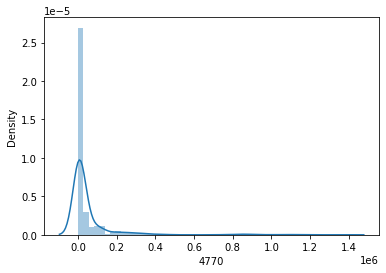

In [124]:
sns.distplot(df['4770']);

distributed normally in the beginning but skewed at the end.

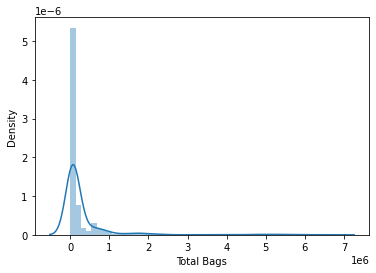

In [125]:
sns.distplot(df['Total Bags']);

Here as well lot of skewness present.

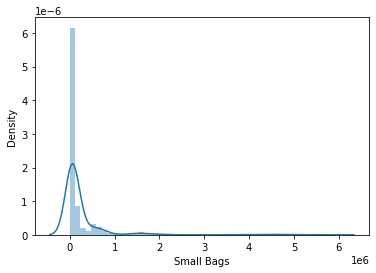

In [126]:
sns.distplot(df['Small Bags']);

TLot of skewness present at the end.

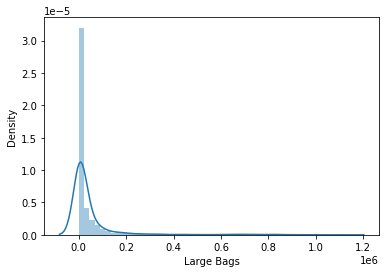

In [127]:
sns.distplot(df['Large Bags']);

Skewed data present.

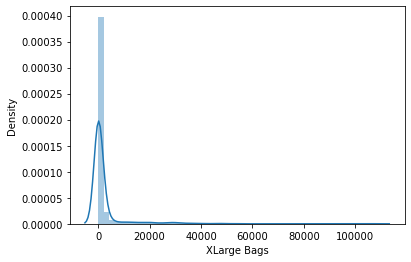

In [128]:
sns.distplot(df['XLarge Bags']);

The data here also has skewness.right skewed.

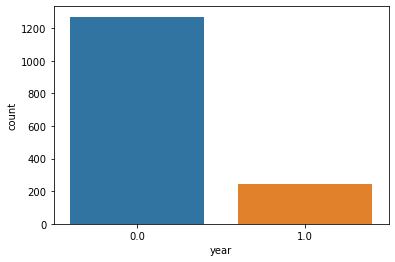

In [136]:
sns.countplot(df['year']);

count of 0 i.e year 2015 is way more then 2016

<function matplotlib.pyplot.show(*args, **kw)>

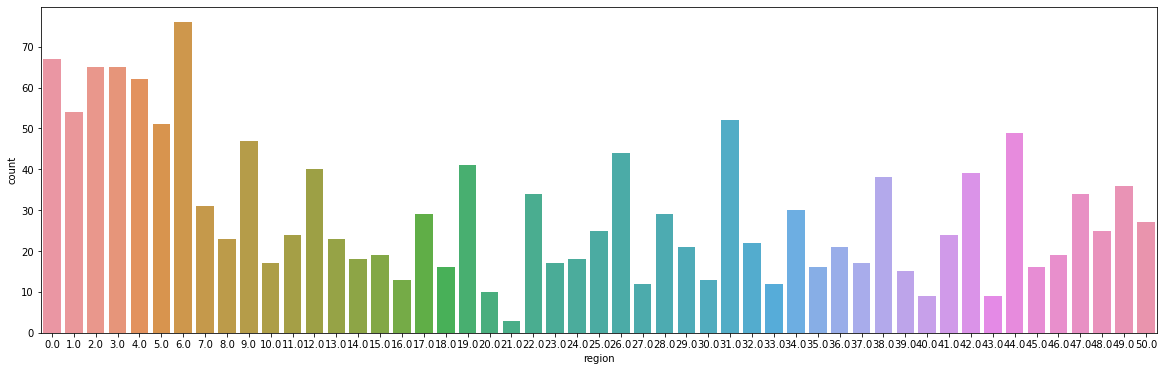

In [142]:
plt.figure(figsize=[20,6])
sns.countplot(df['region']);
plt.show

We can see the count of our categories in region column. all categories are fairly balanced

### Checking correlation

In [144]:
cor= df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,0.236579
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,0.269481
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,0.215733
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,0.297452
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,-0.046144
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.470472


Here we can see the correlation between all the columns, lets visualize it.

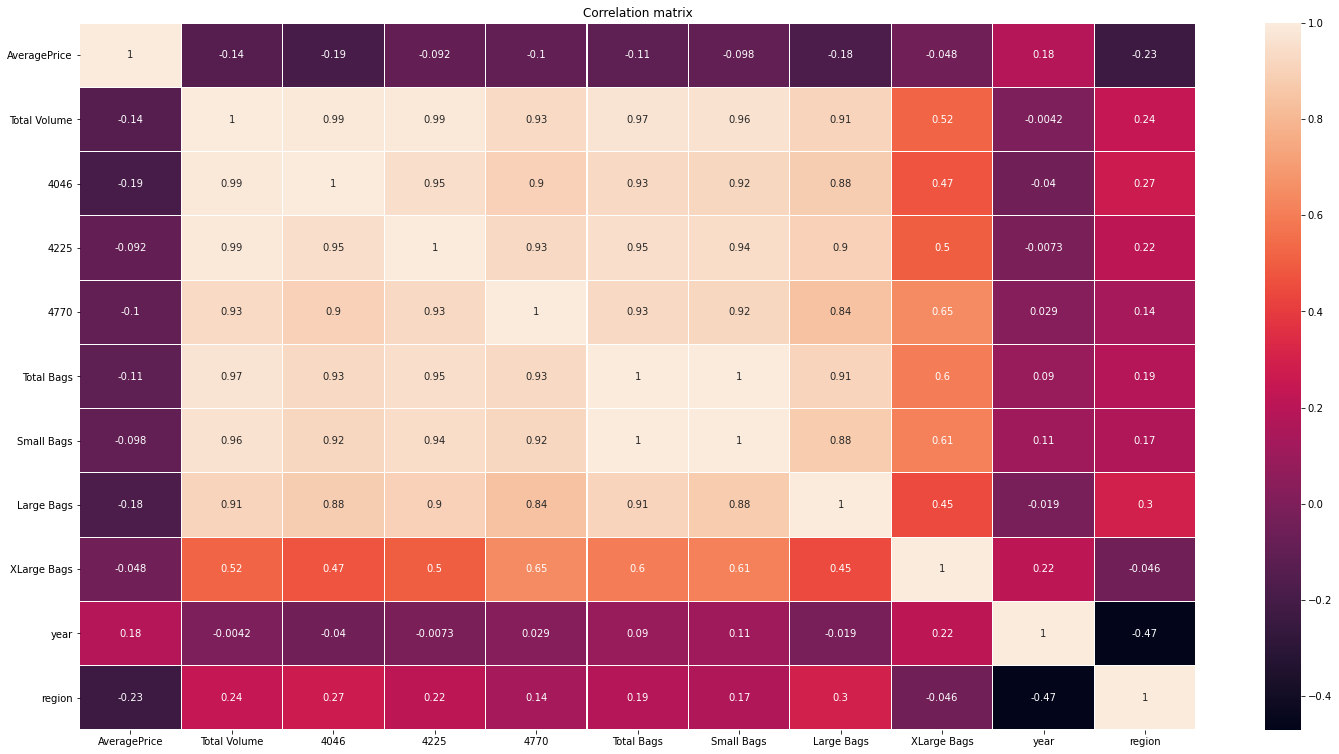

In [145]:
plt.figure(figsize=[25,13])
sns.heatmap(cor, annot=True,linewidth=0.1);
plt.title('Correlation matrix')
plt.show()

We can see in the dataset some very positive correlation and some negative correlation as well. most of the independent columns are very positively correlated with each other. but the target is not very correlated with the independent columns.

In [146]:
# checking correlation of target with independent columns.

cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
year            0.178683
XLarge Bags    -0.048284
4225           -0.092084
Small Bags     -0.097682
4770           -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
4046           -0.190096
region         -0.229408
Name: AveragePrice, dtype: float64

We can check the correlation of our target with the independent columns. lets visualize it for better understanding.

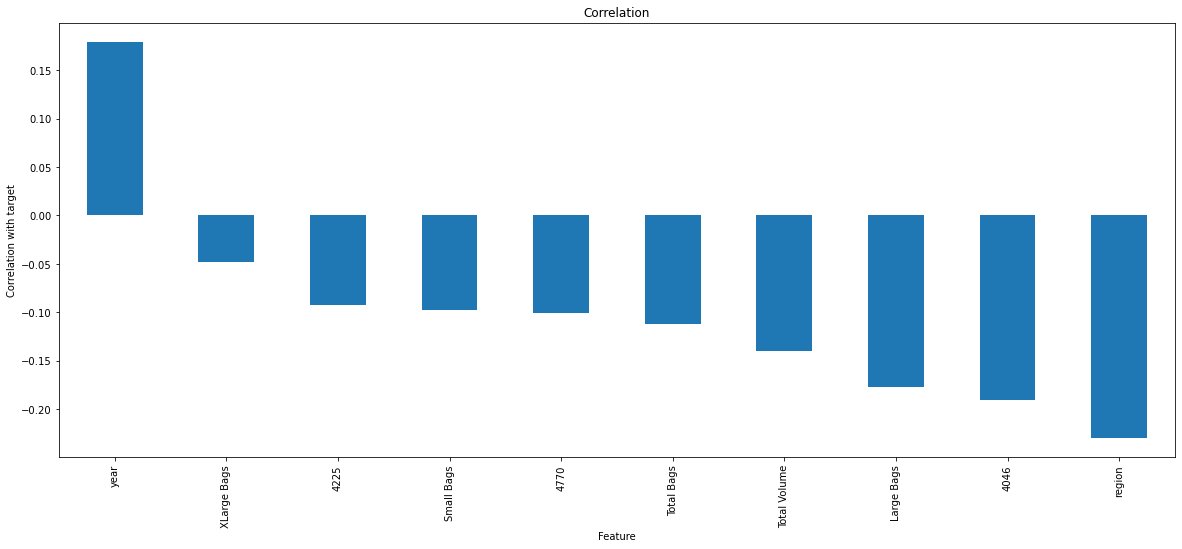

In [147]:
plt.figure(figsize=(20,8))
cor['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation with target')
plt.title('Correlation')
plt.show()

We can see all the independent columns having a negative correlation with the target except the year column.

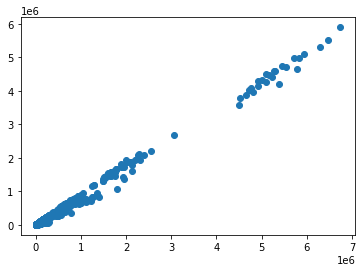

In [149]:
plt.scatter(df['Total Bags'],df['Small Bags'])
plt.show()

The two independent columns have the most positive correlation in the dataset.

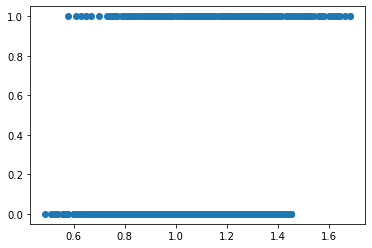

In [151]:
plt.scatter(df['AveragePrice'],df['year'])
plt.show()

A positive correlation, though year is caterogical.

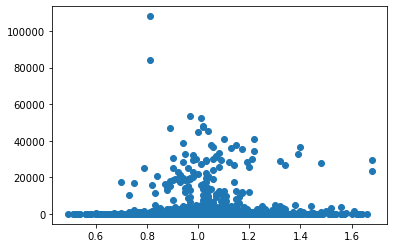

In [152]:
plt.scatter(df['AveragePrice'],df['XLarge Bags'])
plt.show()

Lot of variance in the data points. no correlation.

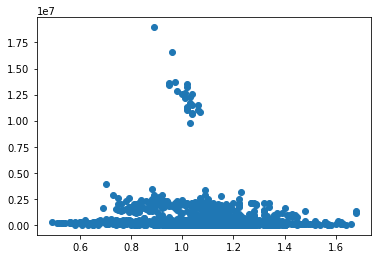

In [154]:
plt.scatter(df['AveragePrice'],df['4225'])
plt.show()

A negative correlation with data points scattered.

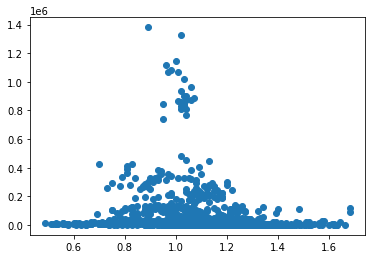

In [155]:
plt.scatter(df['AveragePrice'],df['4770'])
plt.show()

A negative correlation here as well.

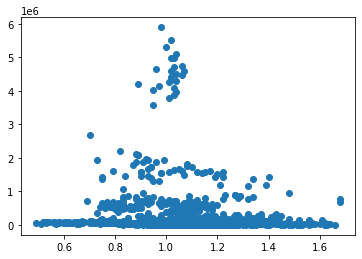

In [156]:
plt.scatter(df['AveragePrice'],df['Small Bags'])
plt.show()

A negative correlation with the target

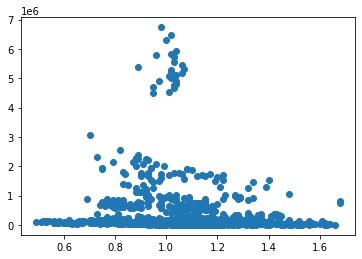

In [157]:
plt.scatter(df['AveragePrice'],df['Total Bags'])
plt.show()

A negative correlation with the points scattered.

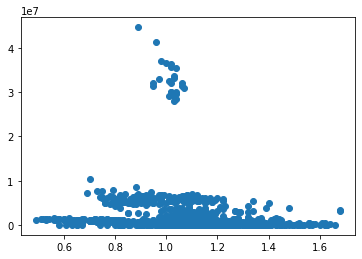

In [158]:
plt.scatter(df['AveragePrice'],df['Total Volume'])
plt.show()

A very negatibe correlation with variance in the points.

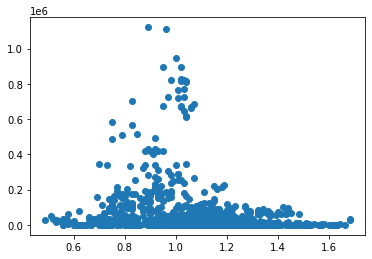

In [159]:
plt.scatter(df['AveragePrice'],df['Large Bags'])
plt.show()

A negative correlation.

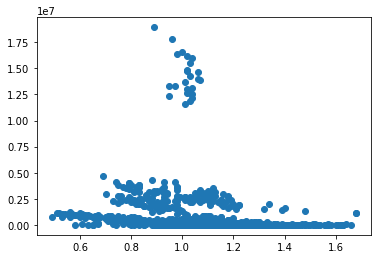

In [160]:
plt.scatter(df['AveragePrice'],df['4046'])
plt.show()

Data points scattered with a negative correlation.

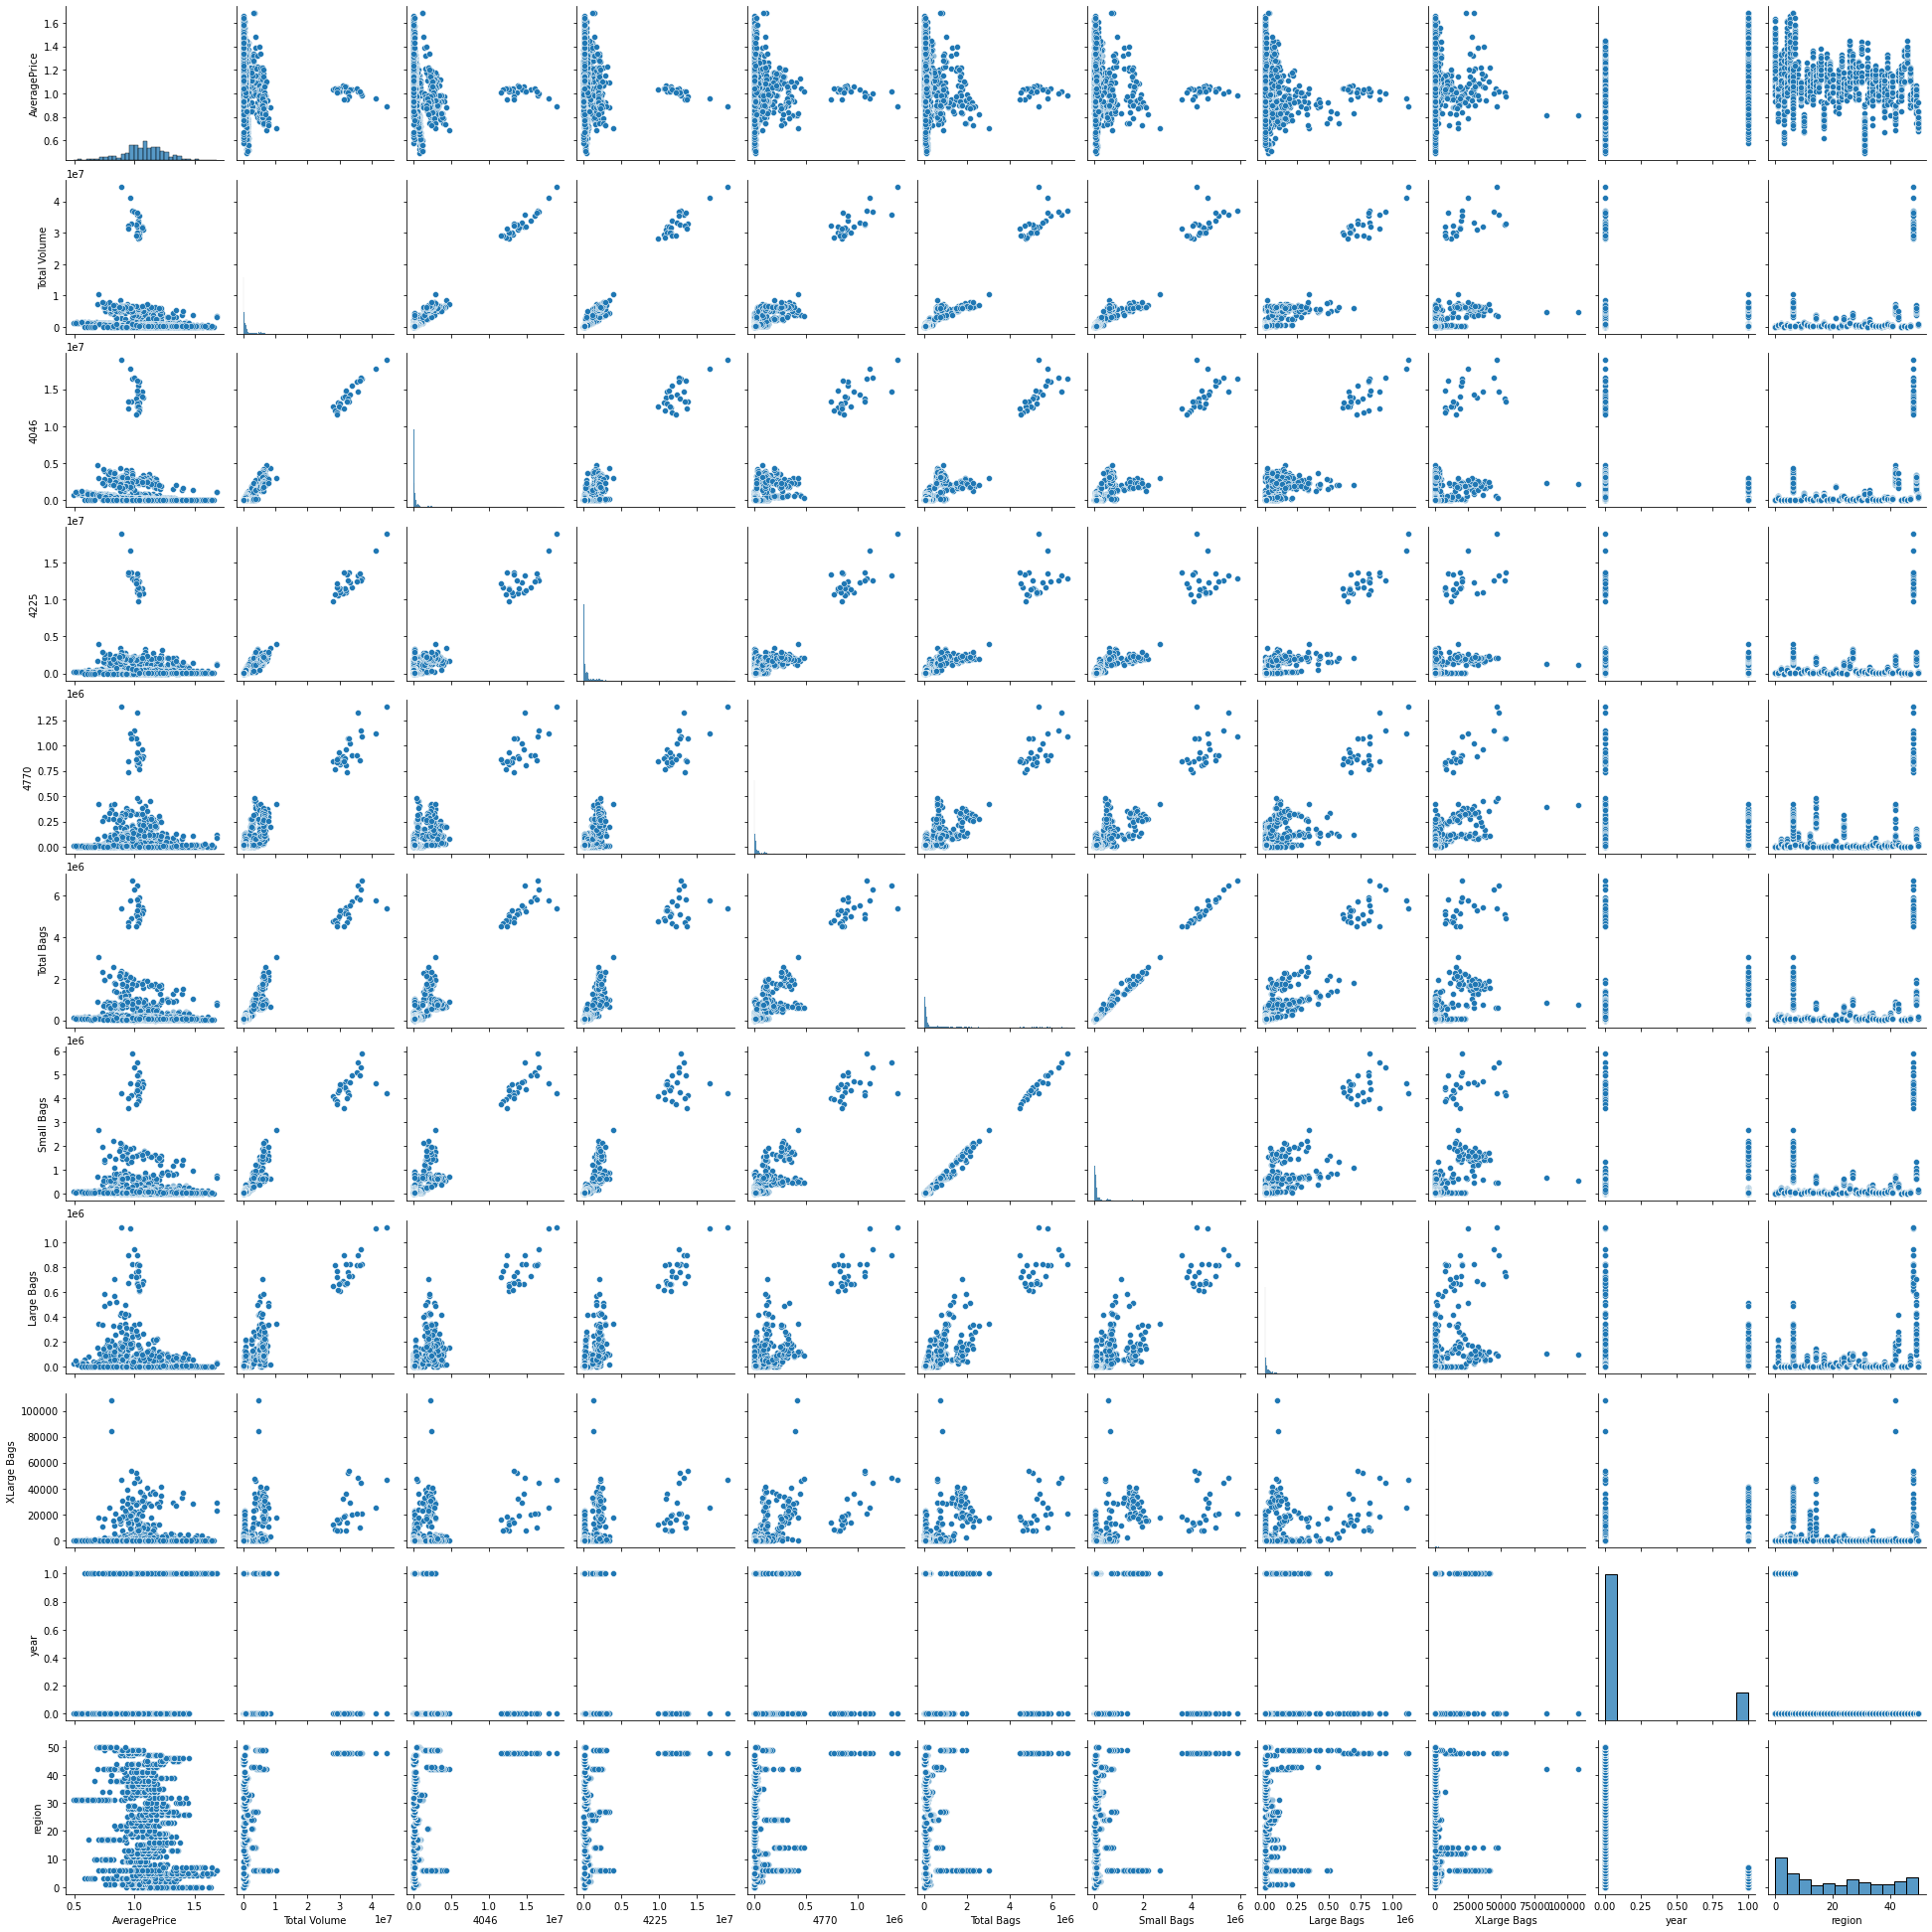

In [161]:
sns.pairplot(df);

Here we have the correlation of the entire dataset. a multivariate analysis.

## Checking outliers

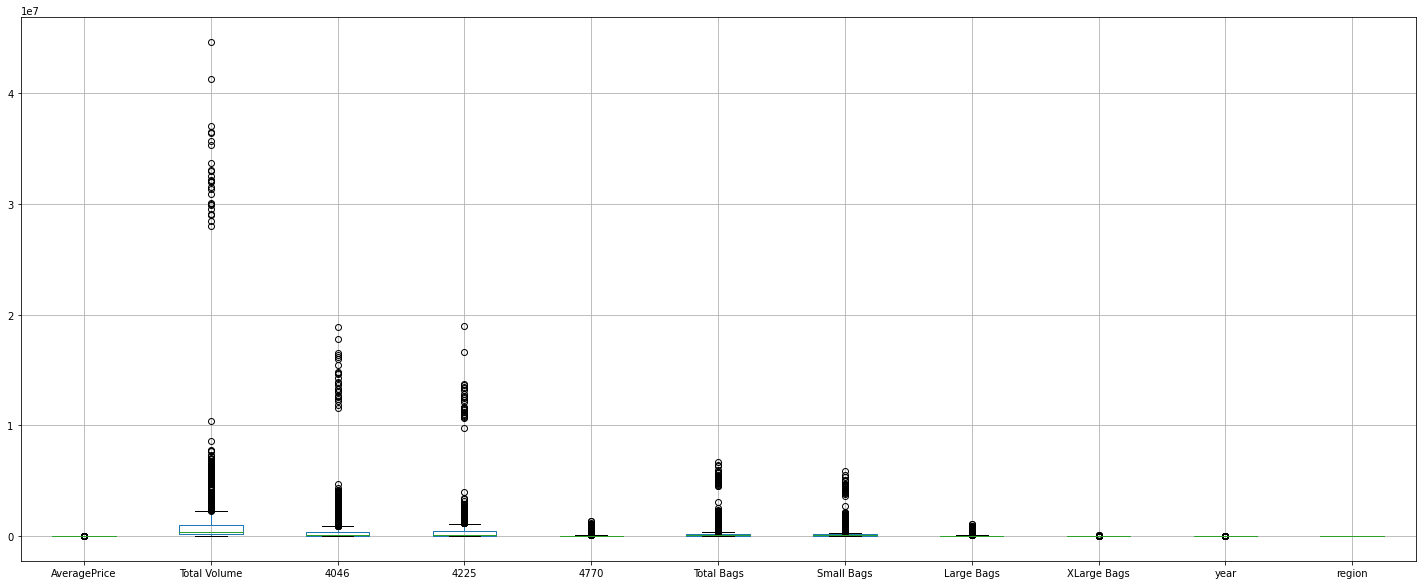

In [163]:
df.boxplot(figsize=(25,10))
plt.show()

We can check the boxplot for outliers for all the columns, lets inspect closely.

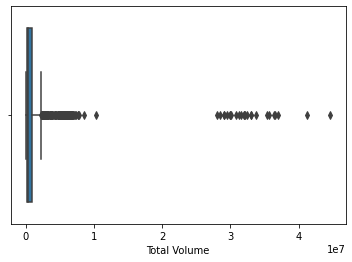

In [164]:
sns.boxplot(df['Total Volume'])

Here we can see some outlier in the data. some are far away.

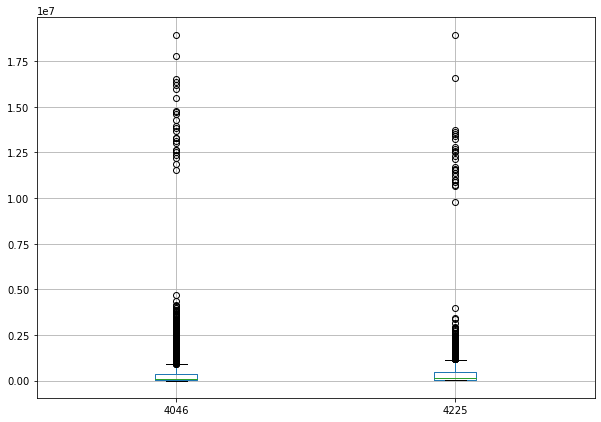

In [167]:
df.iloc[:,2:4].boxplot(figsize=[10,7])
plt.show()

Here too we can see some outliers present.

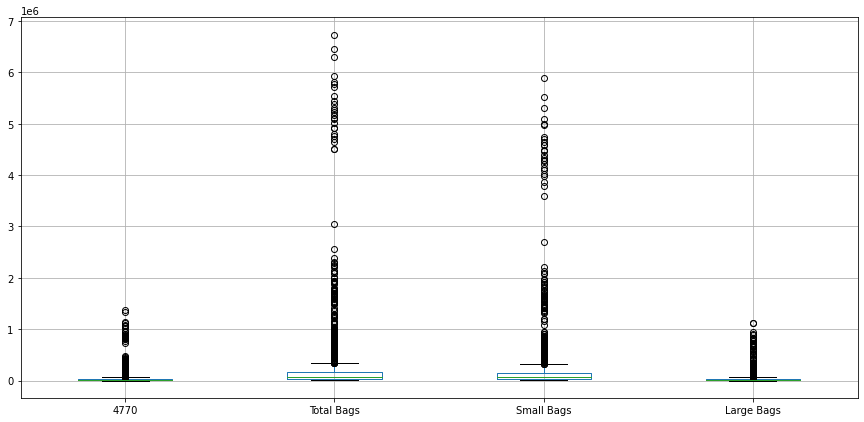

In [171]:
df.iloc[:,4:8].boxplot(figsize=[15,7])
plt.show()

Outliers can be seen in these columns as well, some are close to the whiskers and some are far away.

In [11]:
# removing outliers

from scipy.stats import zscore
z= np.abs(zscore(df))
df_new= df[(z<3).all(axis=1)] # threshold is kept 3.

In [12]:
df.shape

(1517, 11)

In [13]:
df_new.shape

(1436, 11)

In [14]:
dataloss= (1517-1436)/1517*100
dataloss

5.339485827290705

Here data loss is nearly 5%. so we can remove the outliers.

### Checking skewness

In [15]:
df_new.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
dtype: float64

We can see lot of skewness present in columns, taking threshold of(<0.5 and >-0.5). lets treat them.

In [195]:
# before treating skewness. lets split data into x and y

x= df_new.drop('AveragePrice', axis=1)
y= df_new['AveragePrice']

In [196]:
# Using log transformation for columns not having '0'.

for i in x.columns:
    if 0 in x[i].unique():
        pass
    else:
        x[i]= np.log(x[i])

In [197]:
x.skew()

Total Volume    0.462892
4046           -0.270542
4225            0.011274
4770            3.331191
Total Bags      0.378608
Small Bags      0.420794
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
dtype: float64

In [198]:
# Treating the columns left with skewness, except caterogical columns with cube root transformation.

colms=['4770','Large Bags', 'XLarge Bags']

for i in x[colms]:
    if x[i].skew()>0.5:
        x[i]= np.cbrt(x[i].values.reshape(-1,1))
        
    if x[i].skew()<-0.5:
        x[i]= np.cbrt(x[i].values.reshape(-1,1))
x.skew()

Total Volume    0.462892
4046           -0.270542
4225            0.011274
4770            1.076970
Total Bags      0.378608
Small Bags      0.420794
Large Bags      0.933361
XLarge Bags     1.867443
year            2.004439
region          0.276276
dtype: float64

The skwness is removed and minimized for the continious data columns. lets proceed.

## Scaling

In [199]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()
x1= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x1

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,0.093621,0.086438,0.452577,0.048331,0.146677,0.147719,0.064757,0.000000,0.0,0.00
1,0.064451,0.039721,0.426263,0.051518,0.160185,0.161549,0.065724,0.000000,0.0,0.00
2,0.206610,0.057565,0.544631,0.067380,0.136724,0.137278,0.066970,0.000000,0.0,0.00
3,0.131923,0.095983,0.489508,0.055411,0.085425,0.083400,0.073032,0.000000,0.0,0.00
4,0.051023,0.075971,0.423868,0.056214,0.094871,0.091597,0.083189,0.000000,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
1431,0.295321,0.522575,0.457145,0.345092,0.438616,0.416332,0.311255,0.215747,1.0,0.14
1432,0.282659,0.491784,0.446952,0.357058,0.448231,0.433928,0.292536,0.000000,1.0,0.14
1433,0.282841,0.499146,0.448725,0.339796,0.446093,0.430000,0.288646,0.325480,1.0,0.14
1434,0.293650,0.515923,0.450466,0.344853,0.449738,0.436590,0.288880,0.000000,1.0,0.14


Our data is scaled. now lets proceed.

## Finding best random state

In [200]:
maxscr=0
maxrs=0
for i in range(1,150):
    x_train,x_test,y_train,y_test= train_test_split(x1,y, test_size=.25,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= r2_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.4670264200856724 on random state 57


We found the best score for random state 57

In [201]:
# Creating train test split using best random state

x_train,x_test,y_train,y_test= train_test_split(x1,y, test_size=.25,random_state=57)

## Model creation

In [202]:
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)
print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))
print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predlr)))

Score:  0.36408171428593816
r2 score:  0.4670264200856724
Mean absolute error: 0.10976275881428305
Mean squared error: 0.018957787653755245
Root mean squared error: 0.13768728210606543


In [203]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)
print('Score: ',dt.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preddt))
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error:', mean_squared_error(y_test,preddt))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preddt)))

Score:  1.0
r2 score:  0.5554746122245836
Mean absolute error: 0.08384401114206126
Mean squared error: 0.0158116991643454
Root mean squared error: 0.1257445790654428


In [204]:
# Ensemble method

from sklearn.ensemble import RandomForestRegressor
fr=RandomForestRegressor()
fr.fit(x_train,y_train)
predfr=fr.predict(x_test)
print('Score: ',fr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predfr))
print('Mean absolute error:', mean_absolute_error(y_test,predfr))
print('Mean squared error:', mean_squared_error(y_test,predfr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predfr)))

Score:  0.9753028720347874
r2 score:  0.7885088538537762
Mean absolute error: 0.06426183844011141
Mean squared error: 0.00752270729805015
Root mean squared error: 0.08673354194341512


In [205]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Score: ',ad.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predad))
print('Mean absolute error:', mean_absolute_error(y_test,predad))
print('Mean squared error:', mean_squared_error(y_test,predad))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predad)))

Score:  0.6654111496741608
r2 score:  0.6130467618120343
Mean absolute error: 0.09812640377551804
Mean squared error: 0.013763866724274798
Root mean squared error: 0.11731950700661334


In [206]:
from sklearn.svm import SVR
svr= SVR()
svr.fit(x_train,y_train)
preds= svr.predict(x_test)
print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))
print('Mean absolute error:', mean_absolute_error(y_test,preds))
print('Mean squared error:', mean_squared_error(y_test,preds))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preds)))

Score:  0.772369282384539
r2 score:  0.7304456187954114
Mean absolute error: 0.07923121269697028
Mean squared error: 0.009588007572227903
Root mean squared error: 0.09791837198517908


In [207]:
# Regularization

from sklearn.linear_model import Ridge

rd= Ridge()
rd.fit(x_train,y_train)
predrd= rd.predict(x_test)
print('Score: ',rd.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrd))
print('Mean absolute error:', mean_absolute_error(y_test,predrd))
print('Mean squared error:', mean_squared_error(y_test,predrd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrd)))

Score:  0.3474031082632657
r2 score:  0.4521156713390352
Mean absolute error: 0.11065377834464186
Mean squared error: 0.019488160676265447
Root mean squared error: 0.13960000242215417


Here Random forest and support vector are giving us the best score and less errors. lets check cv score for over and under fitting.

## Checking cross validation score

In [120]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr,x1,y,cv=5)
print('cross validation score for linear reg model: ', scr.mean())

cross validation score for linear reg model:  -0.0015834312734340106


In [121]:
scr= cross_val_score(dt,x1,y,cv=5)
print('cross validation score for Decision tree reg model: ', scr.mean())

cross validation score for Decision tree reg model:  -0.5940114171312242


In [122]:
scr= cross_val_score(fr,x1,y,cv=5)
print('cross validation score for Random forest reg model: ', scr.mean())

cross validation score for Random forest reg model:  0.17983490151129441


In [123]:
scr= cross_val_score(ad,x1,y,cv=5)
print('cross validation score for Adaboost reg model: ', scr.mean())

cross validation score for Adaboost reg model:  0.16749269237882775


In [124]:
scr= cross_val_score(svr,x1,y,cv=5)
print('cross validation score for support vector reg model: ', scr.mean())

cross validation score for support vector reg model:  0.1308635563743517


In [125]:
scr= cross_val_score(rd,x1,y,cv=5)
print('cross validation score for ridge reg model: ', scr.mean())

cross validation score for ridge reg model:  0.006153381085192944


For cross validation, Random forest and Adaboost are giving us the best score. And the difference between the r2 score and cv score is less in both Adaboost and Random forest. Lets hyperparameter tune both and find the best model.

## Hyper parameter tuning

In [146]:
from sklearn.model_selection import GridSearchCV

par= {'n_estimators':[50,100,150,200], 'loss':['linear', 'square', 'exponential']}

gcvad= GridSearchCV(ad,par,cv=5) 
gcvad.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200]})

In [147]:
gcvad.best_params_

{'loss': 'square', 'n_estimators': 100}

In [217]:
# Now using the above parameter which is found to be best, we create our model.

adamodel= AdaBoostRegressor(n_estimators= 100,loss= 'square', random_state= 77)
adamodel.fit(x_train,y_train)
predada=adamodel.predict(x_test)
print('Score: ',adamodel.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predada))
print('Mean absolute error:', mean_absolute_error(y_test,predada))
print('Mean squared error:', mean_squared_error(y_test,predada))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predada)))

Score:  0.6928821977227988
r2 score:  0.6203765815530045
Mean absolute error: 0.09554406384675473
Mean squared error: 0.013503146171837746
Root mean squared error: 0.11620303856542541


Using Adaboost we found a training score of 69% and r2 score of 62%. with very less errors.

In [218]:
param= {'max_depth': np.arange(1,9),'criterion' : ["mse", "mae"], 'max_features':['auto','sqrt','log2']}

gcvfr= GridSearchCV(fr, param, cv=5) 
gcvfr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [219]:
gcvfr.best_params_

{'criterion': 'mse', 'max_depth': 8, 'max_features': 'log2'}

In [227]:
# Now using the above parameter which is found to be best, we create our model.

rfrmodel= RandomForestRegressor(max_depth= 8,criterion='mse', max_features='log2', random_state=74)
rfrmodel.fit(x_train,y_train)
predrfr=rfrmodel.predict(x_test)
print('Score: ',rfrmodel.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrfr))
print('Mean absolute error:', mean_absolute_error(y_test,predrfr))
print('Mean squared error:', mean_squared_error(y_test,predrfr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrfr)))

Score:  0.8938216432879421
r2 score:  0.770758550817177
Mean absolute error: 0.07022863215553679
Mean squared error: 0.008154082826667809
Root mean squared error: 0.09029996028054392


Using random forest our model gave a training score of 89% and r2 score of 77%. with errors being very less.

Comparing the two models, Since Random forest is performing better, we make it our final model. Lets save the model.

## Saving the model

In [228]:
import joblib

joblib.dump(rfrmodel,'Avocado.pkl')

['Avocado.pkl']